# Bug da função identifica cor em `visao_module.py`

## Teste com a função original
Inicialmente, fazemos o teste com a função original


In [14]:
import cv2
import numpy as np

def identifica_cor(frame):
    '''
    Segmenta o maior objeto cuja cor é parecida com cor_h (HUE da cor, no espaço HSV).
    '''

    # No OpenCV, o canal H vai de 0 até 179, logo cores similares ao
    # vermelho puro (H=0) estão entre H=-8 e H=8.
    # Precisamos dividir o inRange em duas partes para fazer a detecção
    # do vermelho:
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    cor_menor = np.array([80, 50, 50])
    cor_maior = np.array([120, 255, 255])
    segmentado_cor = cv2.inRange(frame_hsv, cor_menor, cor_maior)

    #cor_menor = np.array([85, 50, 50])
    #cor_maior = np.array([115, 255, 255])
    #segmentado_cor += cv2.inRange(frame_hsv, cor_menor, cor_maior)

    # Note que a notacão do numpy encara as imagens como matriz, portanto o enderecamento é
    # linha, coluna ou (y,x)
    # Por isso na hora de montar a tupla com o centro precisamos inverter, porque
    centro = (frame.shape[1]//2, frame.shape[0]//2)


    def cross(img_rgb, point, color, width,length):
        cv2.line(img_rgb, (point[0] - length/2, point[1]),  (point[0] + length/2, point[1]), color ,width, length)
        cv2.line(img_rgb, (point[0], point[1] - length/2), (point[0], point[1] + length/2),color ,width, length)



    # A operação MORPH_CLOSE fecha todos os buracos na máscara menores
    # que um quadrado 7x7. É muito útil para juntar vários
    # pequenos contornos muito próximos em um só.
    segmentado_cor = cv2.morphologyEx(segmentado_cor,cv2.MORPH_CLOSE,np.ones((7, 7)))

    # Encontramos os contornos na máscara e selecionamos o de maior área
    #contornos, arvore = cv2.findContours(segmentado_cor.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contornos, arvore = cv2.findContours(segmentado_cor.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    maior_contorno = None
    maior_contorno_area = 0

    for cnt in contornos:
        area = cv2.contourArea(cnt)
        if area > maior_contorno_area:
            maior_contorno = cnt
            maior_contorno_area = area

    # Encontramos o centro do contorno fazendo a média de todos seus pontos.
    if not maior_contorno is None :
        cv2.drawContours(frame, [maior_contorno], -1, [0, 0, 255], 5)
        maior_contorno = np.reshape(maior_contorno, (maior_contorno.shape[0], 2))
        media = maior_contorno.mean(axis=0)
        media = media.astype(np.int32)
        cv2.circle(frame, (media[0], media[1]), 5, [0, 255, 0])
        cross(frame, centro, [255,0,0], 1, 17)
    else:
        media = (0, 0)

    # Representa a area e o centro do maior contorno no frame
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    cv2.putText(frame,"{:d} {:d}".format(*media),(20,100), 1, 4,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(frame,"{:0.1f}".format(maior_contorno_area),(20,50), 1, 4,(255,255,255),2,cv2.LINE_AA)

    # was: return centro, result_frame, result_tuples
    return centro, media, area, frame

### Imagem 1: marcador pequeno está dentro do contorno do creeper azul

![](creeper_azul_marcador_in.png)

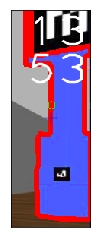

Area:  383.5


In [15]:
img_marcador_in = cv2.imread("creeper_azul_marcador_in.png")

centro, media, area, frame = identifica_cor(img_marcador_in)

from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(frame[:,:,::-1])
plt.xticks([]); plt.yticks([])
plt.show()

print("Area: ", area)


### Imagem 2: marcador pequeno está fora do contorno do creeper azul

![](creeper_azul_marcador_out.png)

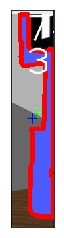

Area:  7490.0


In [17]:
img_marcador_out = cv2.imread("creeper_azul_marcador_out.png")

centro, media, area, frame = identifica_cor(img_marcador_out)

plt.imshow(frame[:,:,::-1])
plt.xticks([]); plt.yticks([])
plt.show()

print("Area: ", area)
